In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 11s 1us/step


In [3]:
len(X_train)


60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

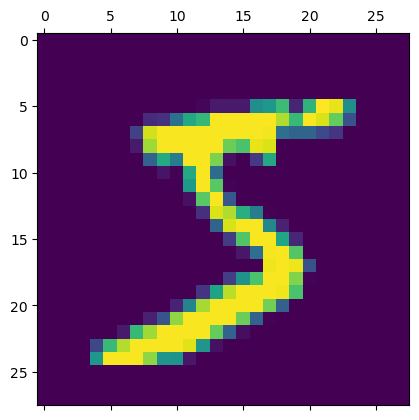

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[2]

4

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train=X_train/255
X_test=X_test/255

In [20]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [21]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4651 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3028 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9253


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9260


[0.26844149827957153, 0.9259999990463257]

In [23]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.69829722e-02, 4.39780081e-07, 5.41622713e-02, 9.66822088e-01,
       2.78291455e-03, 1.31596684e-01, 1.05535844e-06, 9.99827623e-01,
       1.21621504e-01, 6.62206531e-01], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

7

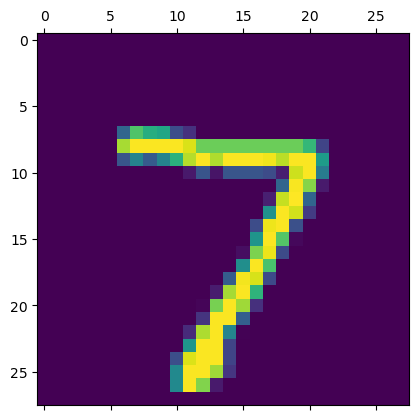

In [16]:
plt.matshow(X_test[0])

In [25]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  934,   20,    9,    4,   10,   10,   27,    3],
       [   1,    0,   18,  939,    0,   16,    2,   11,   18,    5],
       [   2,    1,    6,    2,  923,    0,    7,    4,   10,   27],
       [   9,    3,    3,   45,   10,  771,   13,    5,   27,    6],
       [  15,    3,    9,    1,    8,   12,  906,    2,    2,    0],
       [   2,    8,   22,    7,    7,    0,    0,  950,    2,   30],
       [   9,    8,    8,   34,    9,   28,    9,   11,  851,    7],
       [  11,    7,    1,   15,   36,    5,    0,   26,    4,  904]])>

Text(95.72222222222221, 0.5, 'Truth')

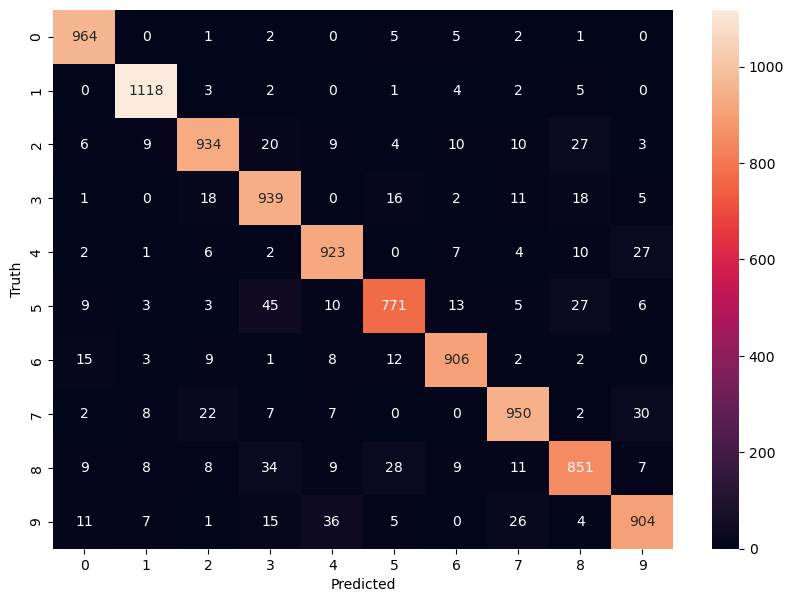

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2742 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9840


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9705


[0.09355884045362473, 0.9704999923706055]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

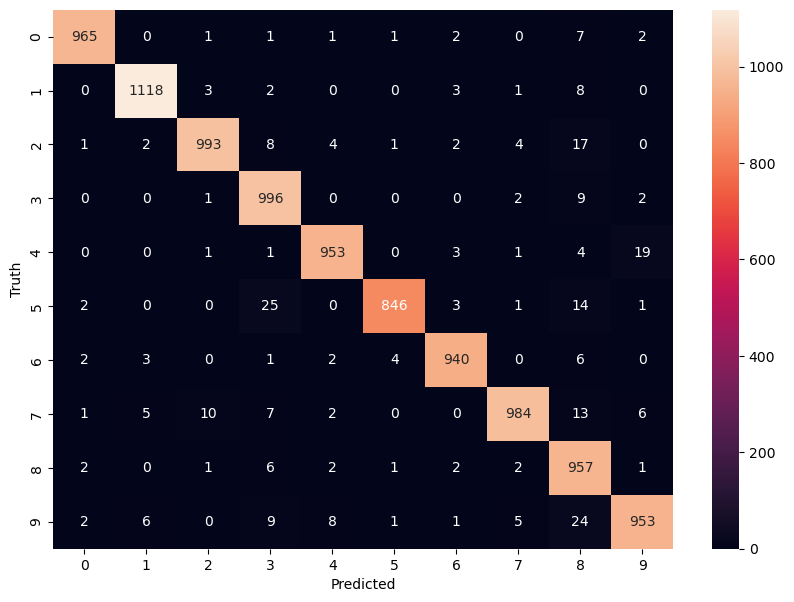

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1222 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0860 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0518 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9777


[0.07825265824794769, 0.9776999950408936]